Here's the code for analyzing listings!

In [1]:
import pandas
from plotnine import *
import parse
import datetime
import warnings
import math

warnings.filterwarnings('ignore')

In [2]:
listings = parse.Listings()
df = listings.fetch_data()
df = df[df['Date'] != 'TBA']
df = df[df['Date'] >= datetime.date.today().strftime('%Y-%m-%d')]

listing_df = df

Checking CoinMarketCap
Page: 1
Page: 2
Checking NFTReminder
Checking Rarity Sniper
Checking UpcomingNFT.net
Checking Crypto.com
Checking mintyscore.com
Checking rarity.tools
Checking seafloor.io
Checking nfteller.io
Checking nftevening.com
Checking icy.tools
Checking nftsolana.io
Checking nextdrop.is
Checking nextdrop.com
Checking oxalus.io


The following code block is going to show you a column plot with the most popular listings.

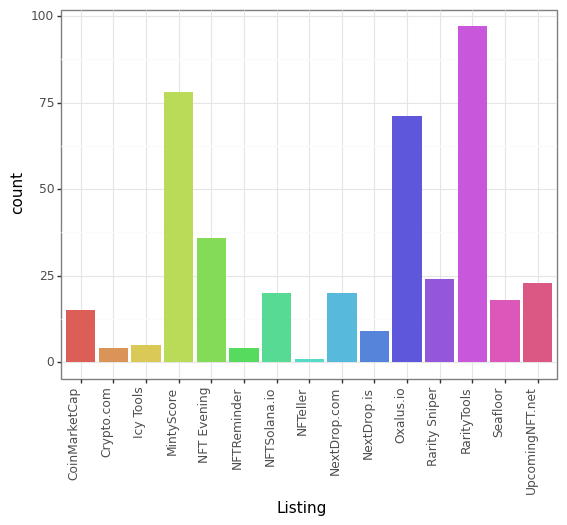

<ggplot: (693932237)>

In [3]:
(ggplot(listing_df, aes(x='Listing', fill='Listing')) + 
 geom_bar() + 
 theme_bw() +
 theme(axis_text_x=element_text(angle=90, hjust=1), 
       legend_position="none"))

The following code block is going to print top 10 the most listed collections

In [4]:
listed_df = df.groupby('Collection').size().reset_index(name='counts')
top10 = listed_df.sort_values('counts', ascending=False).head(10)

#add all the information for the top 10 collections from df
top10 = top10.merge(df, on='Collection', how='left').drop_duplicates(subset='Collection', keep='first')
#print top10
for index, row in top10.iterrows():
    print("Collection: " + row['Collection'] + " (Listed " +  str(row['counts']) + ")")
    print("Date: " + row['Date'])
    print("Mint: " + str(row['Price']) + " at " + row['Platform'])
    print("Twitter: " + row['Twitter'] + "\n")

Collection: Coral Reefers (Listed 6)
Date: 2023-04-04 05:00:00
Mint: 0.031 at Ethereum
Twitter: https://twitter.com/projectzero

Collection: Alpha Checks (Listed 5)
Date: 2023-03-28 07:00:00
Mint: 0.02 at Ethereum
Twitter: https://twitter.com/AlphaChecks_XYZ

Collection: Fantasy Parks (Listed 5)
Date: 2023-04-01 12:00:00
Mint: 0.06 at Ethereum
Twitter: https://twitter.com/natparksnft

Collection: EPIXVERSE (Listed 5)
Date: 2023-03-26 12:00:00
Mint: 0.03 at Ethereum
Twitter: epixversegame

Collection: SAKURA ELEMENTS (Listed 5)
Date: 2023-03-25 12:00:00
Mint: 0.15 at Ethereum
Twitter: Sakura__NFT

Collection: UNITED HYBRID CLUB (Listed 5)
Date: 2023-04-01 08:00:00
Mint: 0.35 at Ethereum
Twitter: https://twitter.com/UnitedHybridNFT

Collection: ATOMBOLTS - WAVE II (Listed 5)
Date: 2023-04-01 08:00:00
Mint: 0.05 at Ethereum
Twitter: https://twitter.com/AtomboltOffical

Collection: ARTOPIA (Listed 5)
Date: 2023-05-20 08:00:00
Mint: 0.001 at Ethereum
Twitter: https://twitter.com/artopianft


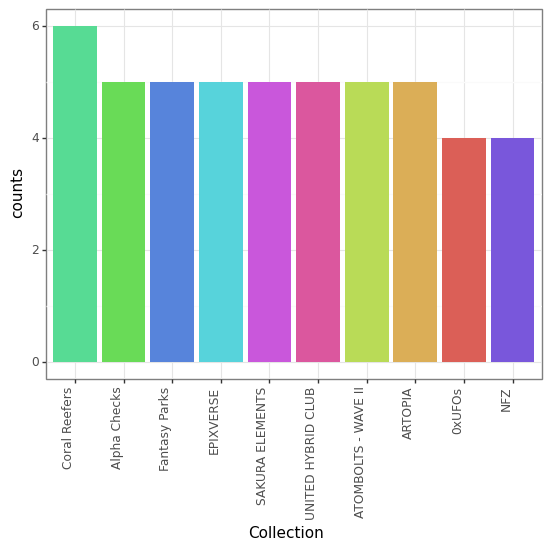

<ggplot: (693100017)>

In [5]:
(ggplot(top10, aes(x='Collection', y='counts', fill='Collection')) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1),
            legend_position="none") +
    scale_x_discrete(limits=top10.sort_values('counts', ascending=False)['Collection']))

Preparing the dataset with mint dates

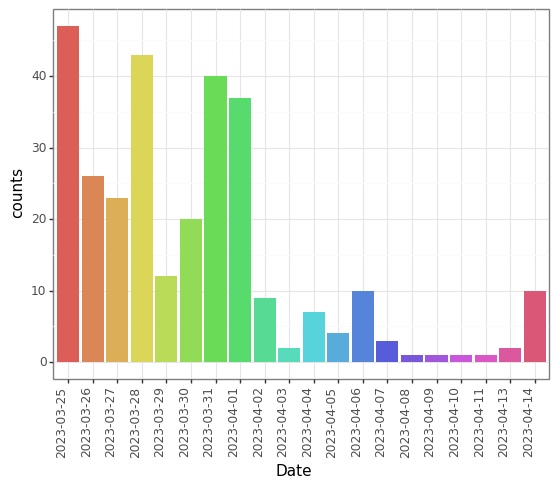

<ggplot: (274639101)>

In [6]:
mint_days_df = df
mint_days_df = mint_days_df[mint_days_df.Date != 'TBA']
#Convert Date to datetime
mint_days_df['Date'] = pandas.to_datetime(mint_days_df['Date'])
mint_days_df['Date'] = mint_days_df['Date'].dt.strftime('%Y-%m-%d')

#group by date and count
popular_mint_days = mint_days_df.groupby('Date').size().reset_index(name='counts')
popular_mint_days = popular_mint_days.sort_values('Date', ascending=True)
popular_mint_days = popular_mint_days[popular_mint_days['Date'] >= datetime.datetime.today().strftime('%Y-%m-%d')]

#Plotting the the next 20 popular mint days
(ggplot(popular_mint_days.head(20), aes(x='Date', y='counts', fill='Date')) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1),
            legend_position="none") +
    scale_x_discrete(limits=popular_mint_days.head(20)['Date']))

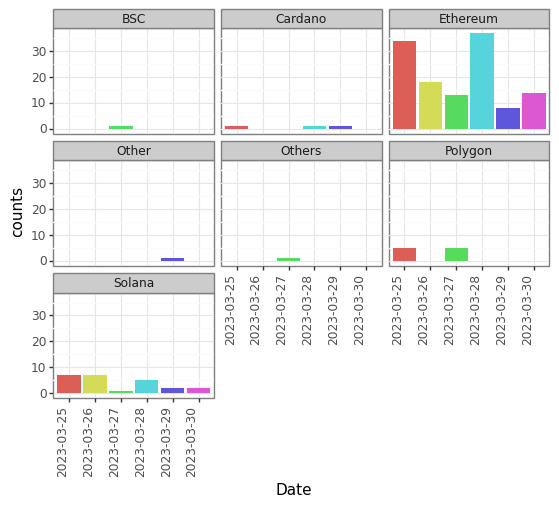

<ggplot: (693098361)>

In [7]:
#Mint days by platform
platform_mint_days = mint_days_df.groupby(['Platform', 'Date']).size().reset_index(name='counts')
platform_mint_days = platform_mint_days.sort_values('Date', ascending=True)
platform_mint_days = platform_mint_days[platform_mint_days['Date'] >= datetime.datetime.today().strftime('%Y-%m-%d')]
platform_mint_days = platform_mint_days[platform_mint_days['Platform'] != '']

(ggplot(platform_mint_days.head(20), aes(x='Date', y='counts', fill='Date')) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1),
            legend_position="none") +
    facet_wrap('~Platform'))

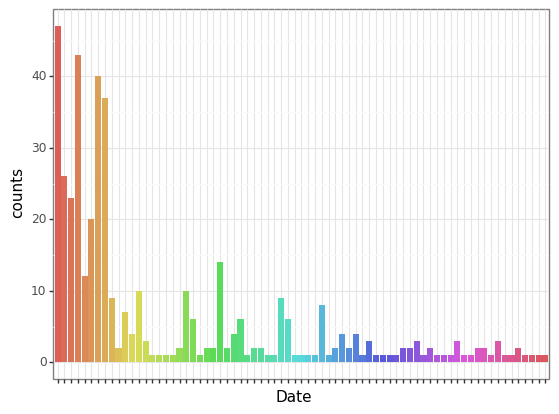

<ggplot: (692756049)>

In [8]:
#Getting the total view of the upcoming mint days
(ggplot(popular_mint_days, aes(x='Date', y='counts', fill='Date')) +
    geom_bar(stat='identity') +
    theme_bw() +
    #remove x axis labels
    theme(axis_text_x=element_blank(),
          legend_position="none") +
    scale_x_discrete(limits=popular_mint_days['Date']))

Проекты с разбивкой по блокчейну.

In [9]:
# Column plot with number of listings per Platform
df_platform = df.groupby('Platform').size().reset_index(name='counts')
df_platform = df_platform[df_platform['Platform'] != '']
print("Total number of listings: " + str(len(df)))
print(df_platform.sort_values('counts', ascending=False))

Total number of listings: 425
   Platform  counts
4  Ethereum     293
8    Solana      86
7   Polygon      15
2   Cardano       5
6    Others       2
1       BSC       1
3    Elrond       1
5     Other       1


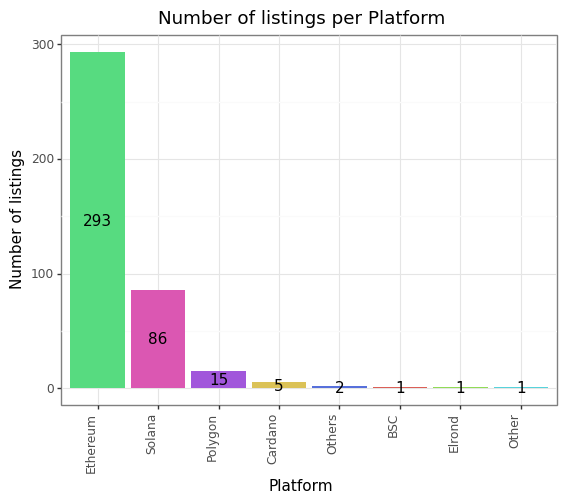

<ggplot: (694945441)>

In [10]:
(ggplot(df_platform, aes(x='Platform', y='counts', fill='Platform')) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1),
            legend_position="none") +
    scale_x_discrete(limits=df_platform.sort_values('counts', ascending=False)['Platform']) +
    geom_text(aes(label='counts'), stat='identity', position=position_stack(vjust=0.5)) + 
    labs(title="Number of listings per Platform", x="Platform", y="Number of listings", fill="Platform"))


Топ-10 по цене проекты.

In [12]:
top_price_df = df
#clean
top_price_df = top_price_df[top_price_df['Platform'] != '']
top_price_df = top_price_df[top_price_df['Price'] != '']
top_price_df = top_price_df[top_price_df['Price'] != 'TBA']
#Change this accordingly
price_dict = {
    'Ethereum': 1722,
    'Solana': 19,
    'Polygon': 1,
    'Cardano': 0.34,
    'Cronos': 0.069,
    'Elrond': 41.88,
    'BSC': 0.0009246,
    'Other': 0
}

#iterate through the dataframe and convert the price to USD
for index, row in top_price_df.iterrows():
    try:
        top_price_df.at[index, 'Price'] = float(row['Price'])
    except:
        top_price_df.at[index, 'Price'] = 0
        
top_price_df = top_price_df[top_price_df['Price'] != 0]

#Convert to USD for Price USD column
top_price_df['Price USD'] = top_price_df.apply(lambda row: row['Price'] * price_dict[row['Platform']], axis=1)

print("Top 10 most expensive listings")
top10_price = top_price_df.sort_values('Price USD', ascending=False)

print("Total number of listings: " + str(len(top_price_df)))
print("Median price: $" + str(top_price_df['Price USD'].median()) + " USD\n")

for index, row in top10_price.head(10).iterrows():
    print("Collection: " + row['Collection'])
    print("Date: " + row['Date'])
    print("Mint: $" + str(row['Price']) + " at " + row['Platform'])
    print("Twitter: " + row['Twitter'] + "\n")


Top 10 most expensive listings
Total number of listings: 286
Median price: $51.66 USD

Collection: Winkles & Flam: Season 1
Date: 2023-03-27 12:00:00
Mint: $750.0 at Ethereum
Twitter: winklesandflam

Collection: poeTrEA HOUSE by Crypto Cuisines Club
Date: 2023-03-30 00:00:00
Mint: $250.0 at Ethereum
Twitter: https://twitter.com/CryptoCuisines

Collection: Yield Ones
Date: 2023-03-31 18:10:00
Mint: $200.0 at Ethereum
Twitter: Community0x

Collection: Montana NFT (MFG)
Date: 2023-04-21 02:00:00
Mint: $150.0 at Ethereum
Twitter: https://twitter.com/montana_matic

Collection: Weird Doctors
Date: 2023-04-02 20:27:00
Mint: $140.0 at Ethereum
Twitter: weirddoctors

Collection: Enders Gate Common Pack Pass
Date: 2023-03-30 08:00:00
Mint: $25.0 at Ethereum
Twitter: EndersGate

Collection: Enders Gate Common Pack Pass
Date: 2023-03-30 04:00:00
Mint: $25.0 at Ethereum
Twitter: https://twitter.com/EndersGate

Collection: RIGLAN: Protectors of the StoryVerse
Date: 2023-04-20 02:00:00
Mint: $3.0 at 

In [13]:
bottom10_price = top_price_df.sort_values('Price USD', ascending=True)

for index, row in bottom10_price.head(10).iterrows():
    print("Collection: " + row['Collection'])
    print("Date: " + row['Date'])
    print("Mint: $" + str(row['Price']) + " at " + row['Platform'])
    print("Twitter: " + row['Twitter'] + "\n")

Collection: Candy x MLB: Showstopper ICONs
Date: 2023-03-29 00:00:00
Mint: $43.0 at Other
Twitter: https://twitter.com/CandyDigital

Collection: Cryptopreneurs NFT Drop
Date: 2023-03-27 00:00:00
Mint: $0.4 at BSC
Twitter: https://twitter.com/crypto_preneurs

Collection: CRYPTOGIFS FREE MINT
Date: 2023-03-25 15:00:00
Mint: $0.0001 at Solana
Twitter: CRYPTOGIFSOL

Collection: Solana Homes
Date: 2023-03-25 10:00:00
Mint: $0.0001 at Solana
Twitter: SolanaHomes

Collection: Alpha Ducks NFT - Polygon
Date: 2023-04-20 00:00:00
Mint: $0.02 at Polygon
Twitter: 

Collection: Crypto Will Prevail
Date: 2023-03-26 12:00:00
Mint: $0.0001 at Ethereum
Twitter: cwp_nft

Collection: ZZ CryptoLabs
Date: 2023-03-26 12:00:00
Mint: $0.0001 at Ethereum
Twitter: zz_cryptolabs

Collection: Panlo
Date: 2023-03-25 12:00:00
Mint: $0.0001 at Ethereum
Twitter: STARTPH_nft

Collection: GGGGG
Date: 2023-03-25 02:00:00
Mint: $0.0001 at Ethereum
Twitter: ggggg_ja

Collection: Daffy Cats
Date: 2023-03-25 12:00:00
Mint: 

In [15]:
def convert_scientific_notation(number):
    return number * 10 ** (int(math.log10(number)) - 5)

#Calculate the total price volume for each platform
platform_price_df = top_price_df.groupby('Platform').sum().reset_index()

print("Total collections with price and platform listed:" + str(len(top_price_df)))
print("Cumulitive total price volume: $" + str(convert_scientific_notation(platform_price_df['Price USD'].sum())) + '\n')

for index, row in platform_price_df.sort_values('Price USD', ascending=False).iterrows():
    try:
        print("Platform: " + row['Platform'])
        print("Total Price Volume: $" + str(convert_scientific_notation(row['Price USD'])) + '\n')
    except:
        continue

Total collections with price and platform listed:286
Cumulitive total price volume: $27013078.7012184

Platform: Ethereum
Total Price Volume: $26972430.179519996

Platform: Solana
Total Price Volume: $24.979338

Platform: Cardano
Total Price Volume: $0.81702

Platform: Polygon
Total Price Volume: $0.72477

Platform: Elrond
Total Price Volume: $0.0025128

Platform: BSC
Total Price Volume: $3.6984000000000005e-12

Platform: Other


In [16]:
#Plot the total price volume for the next 20 days
next_volume_df = top_price_df

#Convert Date to datetime
next_volume_df['Date'] = pandas.to_datetime(next_volume_df['Date'])
next_volume_df['Date'] = next_volume_df['Date'].dt.strftime('%Y-%m-%d')

#For each date, get the total price volume for each platform
next_volume_df = next_volume_df.groupby(['Date', 'Platform']).sum().reset_index()
next_volume_df = next_volume_df[next_volume_df['Date'] >= datetime.datetime.today().strftime('%Y-%m-%d')]
next_volume_df = next_volume_df.sort_values('Date', ascending=True)

print("Total number of upcoming listings: " + str(len(next_volume_df)))
print(next_volume_df.head(20))

Total number of upcoming listings: 78
          Date  Platform     Price USD
0   2023-03-25   Cardano  6.800000e+02
1   2023-03-25  Ethereum  2.614960e+03
2   2023-03-25   Polygon  3.100000e+01
3   2023-03-25    Solana  3.534380e+01
4   2023-03-26  Ethereum  7.165242e+02
5   2023-03-26    Solana  1.921280e+03
7   2023-03-27  Ethereum  1.295847e+06
8   2023-03-27   Polygon  1.150000e+00
6   2023-03-27       BSC  3.698400e-04
9   2023-03-28   Cardano  1.530000e+01
10  2023-03-28  Ethereum  7.795494e+03
11  2023-03-28    Solana  9.595000e+01
12  2023-03-29   Cardano  3.400000e+01
13  2023-03-29  Ethereum  6.750240e+02
14  2023-03-29     Other  0.000000e+00
15  2023-03-30  Ethereum  5.178192e+05
17  2023-03-31   Polygon  1.000000e+00
18  2023-03-31    Solana  3.800000e+01
16  2023-03-31  Ethereum  3.463786e+05
19  2023-04-01  Ethereum  3.733296e+03


In [17]:
#Print the total volume for the next 20 days for all platforms
print("Total volume for the next 20 days for all platforms")
print(next_volume_df.groupby('Date').sum().reset_index().head(20))

Total volume for the next 20 days for all platforms
          Date     Price USD
0   2023-03-25  3.361304e+03
1   2023-03-26  2.637804e+03
2   2023-03-27  1.295848e+06
3   2023-03-28  7.906744e+03
4   2023-03-29  7.090240e+02
5   2023-03-30  5.178192e+05
6   2023-03-31  3.464176e+05
7   2023-04-01  3.733296e+03
8   2023-04-02  2.412031e+05
9   2023-04-04  1.067640e+02
10  2023-04-05  4.210000e+01
11  2023-04-06  3.710152e+02
12  2023-04-07  8.403360e+01
13  2023-04-13  1.222620e+01
14  2023-04-14  2.090252e+03
15  2023-04-16  3.800000e+01
16  2023-04-18  8.610000e+01
17  2023-04-19  5.166000e+01
18  2023-04-20  6.032120e+03
19  2023-04-21  2.583000e+05


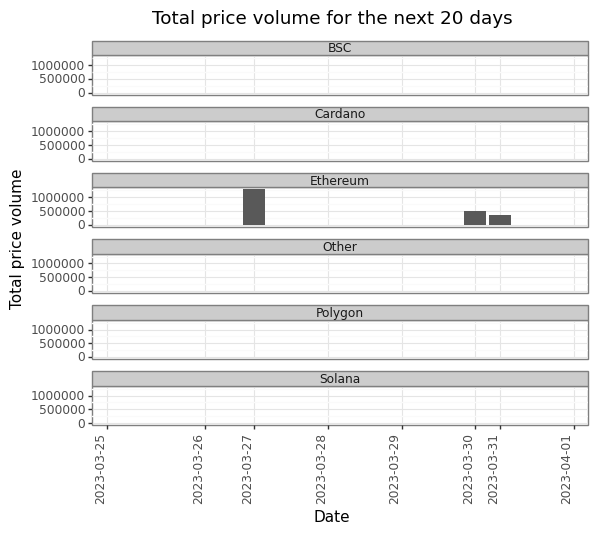

<ggplot: (693679585)>

In [18]:
#Plot the total price volume for the next 20 days
(ggplot(next_volume_df.head(20), aes(x='Date', y='Price USD')) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme(axis_text_x=element_text(angle=90, hjust=1),
            legend_position="none") +
    scale_x_discrete(limits=next_volume_df.head(20)['Date']) +
    facet_wrap('~Platform', ncol=1) +
    labs(title="Total price volume for the next 20 days", x="Date", y="Total price volume", fill="Platform"))